In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
pd.set_option("display.max_rows", None)

In [87]:
file_path = "2025.csv"

In [88]:
df = pd.read_csv(file_path)

In [89]:
df.head()

,Date,Time,Remark,Party,Category,Mode,Cash In,Cash Out,Balance
0,01 Jan 2025,11:27 AM,Pocket Money,NaN,Home,Cash,1073.27,NaN,1073.27
1,01 Jan 2025,08:02 PM,Sandwich,NaN,Food,Cash,NaN,80.0,873.27
2,01 Jan 2025,08:02 PM,Coffee,NaN,Food,Cash,NaN,20.0,953.27
3,01 Jan 2025,08:02 PM,Fries,NaN,Food,Cash,NaN,100.0,973.27
4,02 Jan 2025,03:55 AM,Tea,NaN,Food,Cash,NaN,10.0,753.27


In [90]:
df.tail()

,Date,Time,Remark,Party,Category,Mode,Cash In,Cash Out,Balance
288,25 Apr 2025,08:04 PM,Stationery,NaN,College,Cash,NaN,10.0,-668.3
289,26 Apr 2025,12:02 AM,Wafers,NaN,Food,Cash,NaN,30.0,-728.3
290,26 Apr 2025,12:02 AM,Biscuit,NaN,Food,Cash,NaN,10.0,-698.3
291,26 Apr 2025,08:05 PM,Rickshaw,NaN,Travel,Cash,NaN,40.0,-768.3
292,26 Apr 2025,08:06 PM,Puff,NaN,Food,Cash,NaN,90.0,-858.3


# Data Preprocessing

In [91]:
columns_to_delete = ['Time', 'Party','Mode','Balance']
df = df.drop(columns=columns_to_delete)

In [92]:
df.head()

,Date,Remark,Category,Cash In,Cash Out
0,01 Jan 2025,Pocket Money,Home,1073.27,NaN
1,01 Jan 2025,Sandwich,Food,NaN,80.0
2,01 Jan 2025,Coffee,Food,NaN,20.0
3,01 Jan 2025,Fries,Food,NaN,100.0
4,02 Jan 2025,Tea,Food,NaN,10.0


In [93]:
# Check for duplicate rows
duplicates = df.duplicated()

if duplicates.any():
    print("Duplicate rows found:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [94]:
# Count NaN values in the 'Category' column
nan_count = df['Category'].isna().sum()
print(f"Number of NaN values in 'Category': {nan_count}")

Number of NaN values in 'Category': 0


# CASH IN

In [95]:
# Filter rows where 'Cash In' is not null
cash_in_not_null = df[df['Cash In'].notnull()]

# Display the filtered DataFrame
print("Rows where 'Cash In' is not null:")
print(cash_in_not_null)

Rows where 'Cash In' is not null:
            Date        Remark Category  Cash In  Cash Out
0    01 Jan 2025  Pocket Money     Home  1073.27       NaN
19   06 Jan 2025  Pocket Money     Home  3000.00       NaN
54   23 Jan 2025  Pocket Money     Home  2000.00       NaN
97   14 Feb 2025  Pocket Money     Home  1500.00       NaN
116  24 Feb 2025  Pocket Money     Home  2000.00       NaN
139  07 Mar 2025  Pocket Money     Home  2000.00       NaN
157  13 Mar 2025  Pocket Money     Home  5500.00       NaN
170  19 Mar 2025  Pocket Money     Home  3500.00       NaN
233  11 Apr 2025  Pocket Money     Home  3000.00       NaN
243  15 Apr 2025  Pocket Money     Home  1500.00       NaN
244  16 Apr 2025  Pocket Money     Home  1250.00       NaN
285  24 Apr 2025  Pocket Money     Home  3000.00       NaN


# CASH OUT

In [96]:
if 'Category' in df.columns:
    grouped_df = df.groupby('Category').sum(numeric_only=True)
    print("Grouped Data:")
    print(grouped_df)
else:
    print("The 'Category' column is not present in the DataFrame.")

Grouped Data:
           Cash In  Cash Out
Category                    
Basic         0.00   1089.00
Clothes       0.00   4754.00
College       0.00   6117.00
Food          0.00  11961.82
Health        0.00   1555.00
Home      29323.27      0.00
Other         0.00    336.00
Phone         0.00    666.00
Travel        0.00   3702.75


### Basic

In [97]:
rows_with_basic = df[df['Category'] == 'Basic']

print("Rows where 'Category' is 'Basic':")
print(rows_with_basic)

Rows where 'Category' is 'Basic':
            Date                    Remark Category  Cash In  Cash Out
10   03 Jan 2025                Toothpaste    Basic      NaN      20.0
32   11 Jan 2025      Gillette Guard Blade    Basic      NaN     110.0
60   25 Jan 2025                    Bottle    Basic      NaN      39.0
79   07 Feb 2025                   Shampoo    Basic      NaN      20.0
95   13 Feb 2025                    Bottle    Basic      NaN      80.0
150  12 Mar 2025                Toothbrush    Basic      NaN      70.0
154  12 Mar 2025                 Face Wash    Basic      NaN      30.0
164  16 Mar 2025                 Body Wash    Basic      NaN      92.0
172  20 Mar 2025              Hair Cutting    Basic      NaN     200.0
198  29 Mar 2025               Box Cricket    Basic      NaN     170.0
227  10 Apr 2025             Talcum Powder    Basic      NaN     139.0
228  10 Apr 2025  Dettole Antiseptic Water    Basic      NaN      40.0
280  23 Apr 2025       Spraay Salasa Zudio 

In [98]:
grouped_df = rows_with_basic.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
                          Cash In  Cash Out
Remark                                     
Body Wash                     0.0      92.0
Bottle                        0.0     119.0
Box Cricket                   0.0     170.0
Dettole Antiseptic Water      0.0      40.0
Face Wash                     0.0      30.0
Gillette Guard Blade          0.0     110.0
Hair Cutting                  0.0     200.0
Shampoo                       0.0      20.0
Spraay Salasa Zudio           0.0      79.0
Talcum Powder                 0.0     139.0
Toothbrush                    0.0      70.0
Toothpaste                    0.0      20.0


### Clothes

In [99]:
rows_with_clothes = df[df['Category'] == 'Clothes']

print("Rows where 'Category' is 'Basic':")
print(rows_with_clothes)

Rows where 'Category' is 'Basic':
            Date                          Remark Category  Cash In  Cash Out
22   06 Jan 2025  Men Shirt with Band Collar | M  Clothes      NaN     463.5
42   15 Jan 2025                 Clothes Washing  Clothes      NaN      30.0
78   06 Feb 2025                 Clothes Washing  Clothes      NaN      35.0
85   11 Feb 2025                 Clothes Washing  Clothes      NaN      50.0
104  18 Feb 2025                 Clothes Washing  Clothes      NaN      20.0
109  21 Feb 2025                 Clothes Washing  Clothes      NaN      10.0
112  22 Feb 2025                 Clothes Washing  Clothes      NaN      34.0
149  12 Mar 2025                Zudio Black Vest  Clothes      NaN     299.0
153  12 Mar 2025                 Clothes Washing  Clothes      NaN      20.0
205  01 Apr 2025                 Clothes Washing  Clothes      NaN      10.0
235  13 Apr 2025                 cK Black Tshirt  Clothes      NaN    1000.0
251  17 Apr 2025          Cool Colors Blue

In [100]:
grouped_df = rows_with_clothes.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
                                Cash In  Cash Out
Remark                                           
Clothes Washing                     0.0     229.0
Cool Colors Black-Gray Shirt        0.0     887.0
Cool Colors Blue Shirt              0.0     827.0
Men Shirt with Band Collar | M      0.0     463.5
Sky Blue Jeans                      0.0     849.5
Zudio Black Vest                    0.0     299.0
Zudio Shorts                        0.0     199.0
cK Black Tshirt                     0.0    1000.0


### Collage

In [101]:
rows_with_collage = df[df['Category'] == 'College']

print("Rows where 'Category' is 'College':")
print(rows_with_collage)

Rows where 'Category' is 'College':
            Date                          Remark Category  Cash In  Cash Out
14   04 Jan 2025                      Stationery  College      NaN      13.0
110  21 Feb 2025                      Stationery  College      NaN      14.0
124  28 Feb 2025                      Stationery  College      NaN      10.0
167  17 Mar 2025                       Exam Fees  College      NaN    2500.0
168  17 Mar 2025                Convocation Fees  College      NaN    3000.0
176  20 Mar 2025                      Stationery  College      NaN      10.0
281  23 Apr 2025  Report Binding + Report Spiral  College      NaN     560.0
288  25 Apr 2025                      Stationery  College      NaN      10.0


In [102]:
grouped_df = rows_with_collage.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
                                Cash In  Cash Out
Remark                                           
Convocation Fees                    0.0    3000.0
Exam Fees                           0.0    2500.0
Report Binding + Report Spiral      0.0     560.0
Stationery                          0.0      57.0


### Food

In [103]:
rows_with_food = df[df['Category'] == 'Food']

print("Rows where 'Category' is 'Food':")
print(rows_with_food)

Rows where 'Category' is 'Food':
            Date            Remark Category  Cash In  Cash Out
1    01 Jan 2025          Sandwich     Food      NaN     80.00
2    01 Jan 2025            Coffee     Food      NaN     20.00
3    01 Jan 2025             Fries     Food      NaN    100.00
4    02 Jan 2025               Tea     Food      NaN     10.00
5    02 Jan 2025              Puff     Food      NaN     30.00
6    02 Jan 2025             Maggi     Food      NaN     80.00
7    02 Jan 2025           Bhajiya     Food      NaN     46.67
8    02 Jan 2025           Gathiya     Food      NaN     45.00
9    03 Jan 2025       Soup Packet     Food      NaN     20.00
11   03 Jan 2025        Manchurian     Food      NaN    110.00
12   03 Jan 2025          Panipuri     Food      NaN     20.00
15   04 Jan 2025            Samosa     Food      NaN     40.00
16   04 Jan 2025           Khandvi     Food      NaN     30.00
17   05 Jan 2025            Wafers     Food      NaN     40.00
18   05 Jan 2025      

In [104]:
grouped_df = rows_with_food.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

# Store in a CSV file
grouped_df.to_csv('food_grouped_data.csv', index=True)


Grouped Data:
                  Cash In  Cash Out
Remark                             
Aagman Thal           0.0    350.00
Bhajiya               0.0    248.67
Bhel                  0.0    120.00
Biscuit               0.0    279.00
Black Dry Grapes      0.0     45.00
Chatuney              0.0     50.00
Chips                 0.0     60.00
Chocolate             0.0     66.00
Chole Kulche          0.0     70.00
Chorafali             0.0     23.33
Coffee                0.0     45.00
Cold Drink            0.0    317.00
Dhosa                 0.0    302.50
Frenkie               0.0    140.00
Fries                 0.0    400.00
Gathiya               0.0    135.00
Grapes                0.0     95.66
Ice Cream             0.0    772.00
Ice Cream             0.0     20.00
Ice Dish              0.0    174.00
Khandvi               0.0     76.67
Macdonalds            0.0    114.88
Maggi                 0.0    190.00
Maggi Masala          0.0     10.00
Manchurian            0.0    302.84
Mendu Vada    

### Health

In [105]:
rows_with_health = df[df['Category'] == 'Health']

print("Rows where 'Category' is 'Health':")
print(rows_with_health)

Rows where 'Category' is 'Health':
            Date         Remark Category  Cash In  Cash Out
103  17 Feb 2025  Levroxa 500mg   Health      NaN     772.0
277  23 Apr 2025  Levroxa 500mg   Health      NaN     783.0


In [106]:
grouped_df = rows_with_health.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
               Cash In  Cash Out
Remark                          
Levroxa 500mg      0.0    1555.0


### Home

In [107]:
rows_with_home = df[df['Category'] == 'Home']

print("Rows where 'Category' is 'Home':")
print(rows_with_home)

Rows where 'Category' is 'Home':
            Date        Remark Category  Cash In  Cash Out
0    01 Jan 2025  Pocket Money     Home  1073.27       NaN
19   06 Jan 2025  Pocket Money     Home  3000.00       NaN
54   23 Jan 2025  Pocket Money     Home  2000.00       NaN
97   14 Feb 2025  Pocket Money     Home  1500.00       NaN
116  24 Feb 2025  Pocket Money     Home  2000.00       NaN
139  07 Mar 2025  Pocket Money     Home  2000.00       NaN
157  13 Mar 2025  Pocket Money     Home  5500.00       NaN
170  19 Mar 2025  Pocket Money     Home  3500.00       NaN
233  11 Apr 2025  Pocket Money     Home  3000.00       NaN
243  15 Apr 2025  Pocket Money     Home  1500.00       NaN
244  16 Apr 2025  Pocket Money     Home  1250.00       NaN
285  24 Apr 2025  Pocket Money     Home  3000.00       NaN


In [108]:
grouped_df = rows_with_home.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
               Cash In  Cash Out
Remark                          
Pocket Money  29323.27       0.0


### Hostel

In [109]:
rows_with_hostel = df[df['Category'] == 'Hostel']

print("Rows where 'Category' is 'Hostel':")
print(rows_with_hostel)

Rows where 'Category' is 'Hostel':
Empty DataFrame
Columns: [Date, Remark, Category, Cash In, Cash Out]
Index: []


In [110]:
grouped_df = rows_with_hostel.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
Empty DataFrame
Columns: [Cash In, Cash Out]
Index: []


### Maintenance

In [111]:
rows_with_maintenance = df[df['Category'] == 'Maintenance']

print("Rows where 'Category' is 'Maintenance':")
print(rows_with_maintenance)

Rows where 'Category' is 'Maintenance':
Empty DataFrame
Columns: [Date, Remark, Category, Cash In, Cash Out]
Index: []


In [112]:
grouped_df = rows_with_maintenance.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
Empty DataFrame
Columns: [Cash In, Cash Out]
Index: []


### Phone

In [113]:
rows_with_phone = df[df['Category'] == 'Phone']

print("Rows where 'Category' is 'Phone':")
print(rows_with_phone)

Rows where 'Category' is 'Phone':
            Date    Remark Category  Cash In  Cash Out
137  07 Mar 2025  Recharge    Phone      NaN     666.0


In [114]:
grouped_df = rows_with_phone.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
          Cash In  Cash Out
Remark                     
Recharge      0.0     666.0


### Other

In [115]:
rows_with_other = df[df['Category'] == 'Other']

print("Rows where 'Category' is 'Other':")
print(rows_with_other)

Rows where 'Category' is 'Other':
            Date                                 Remark Category  Cash In  \
129  01 Mar 2025  Bus, Train Ticket Cancellation Charge    Other      NaN   
130  01 Mar 2025             Wedding Cover Ayush Sister    Other      NaN   

     Cash Out  
129     136.0  
130     200.0  


In [116]:
grouped_df = rows_with_other.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
                                       Cash In  Cash Out
Remark                                                  
Bus, Train Ticket Cancellation Charge      0.0     136.0
Wedding Cover Ayush Sister                 0.0     200.0


### Travel

In [117]:
rows_with_travel = df[df['Category'] == 'Travel']

print("Rows where 'Category' is 'Travel':")
print(rows_with_travel)


Rows where 'Category' is 'Travel':
            Date    Remark Category  Cash In  Cash Out
13   04 Jan 2025  Rickshaw   Travel      NaN     80.00
20   06 Jan 2025  Rickshaw   Travel      NaN     98.00
21   06 Jan 2025  Rickshaw   Travel      NaN     80.00
31   11 Jan 2025       Bus   Travel      NaN    250.00
50   20 Jan 2025  Rickshaw   Travel      NaN     40.00
55   24 Jan 2025  Rickshaw   Travel      NaN     40.00
66   29 Jan 2025  Rickshaw   Travel      NaN     80.00
67   30 Jan 2025  Rickshaw   Travel      NaN    100.00
71   31 Jan 2025       Bus   Travel      NaN     10.00
76   01 Feb 2025       Bus   Travel      NaN     26.00
77   05 Feb 2025       Car   Travel      NaN    105.75
93   13 Feb 2025  Rickshaw   Travel      NaN     80.00
96   14 Feb 2025  Rickshaw   Travel      NaN     80.00
101  17 Feb 2025  Rickshaw   Travel      NaN     80.00
106  19 Feb 2025  Rickshaw   Travel      NaN     40.00
108  20 Feb 2025  Rickshaw   Travel      NaN     40.00
115  24 Feb 2025  Rickshaw   T

In [118]:
grouped_df = rows_with_travel.groupby('Remark').sum(numeric_only=True)
print("Grouped Data:")
print(grouped_df)

Grouped Data:
          Cash In  Cash Out
Remark                     
Bike          0.0     93.00
Bus           0.0    286.00
Car           0.0    105.75
Rickshaw      0.0   3218.00


# Data Visulization

In [119]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d %b %Y")

# Convert 'Cash Out' and 'Cash In' to numeric, filling missing values with 0
df["Cash Out"] = pd.to_numeric(df["Cash Out"], errors="coerce").fillna(0)
df["Cash In"] = pd.to_numeric(df["Cash In"], errors="coerce").fillna(0)

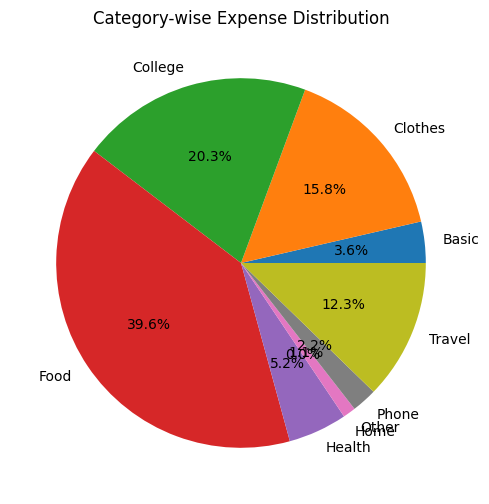

In [120]:
# Pie Chart for Category-wise Expense Distribution
category_expense = df.groupby("Category")["Cash Out"].sum()
plt.figure(figsize=(8, 6))
plt.pie(category_expense, labels=category_expense.index, autopct="%1.1f%%")
plt.title("Category-wise Expense Distribution")
plt.show()

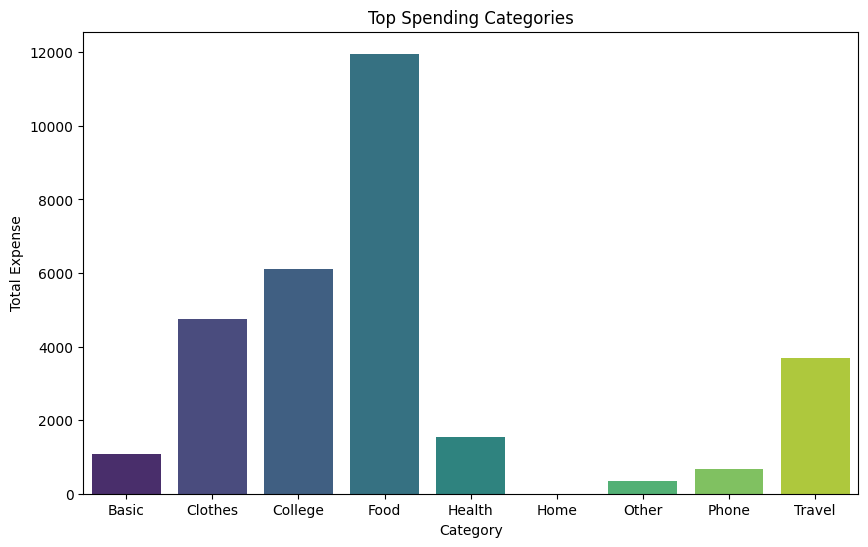

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_expense.index, y=category_expense.values, hue=category_expense.index, palette="viridis")
plt.title("Top Spending Categories")
plt.ylabel("Total Expense")
plt.xlabel("Category")
plt.show()

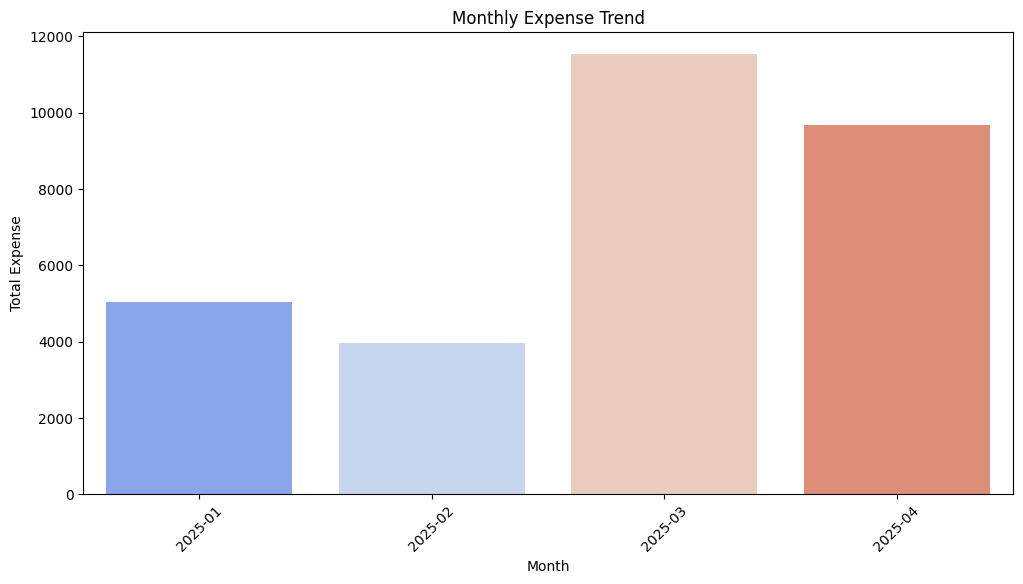

In [122]:
# Monthly Expense Trend
df["Month"] = df["Date"].dt.to_period("M")
monthly_expense = df.groupby("Month")["Cash Out"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_expense.index.astype(str), y=monthly_expense.values, hue=monthly_expense.index.astype(str), palette="coolwarm", legend=False)
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expense")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

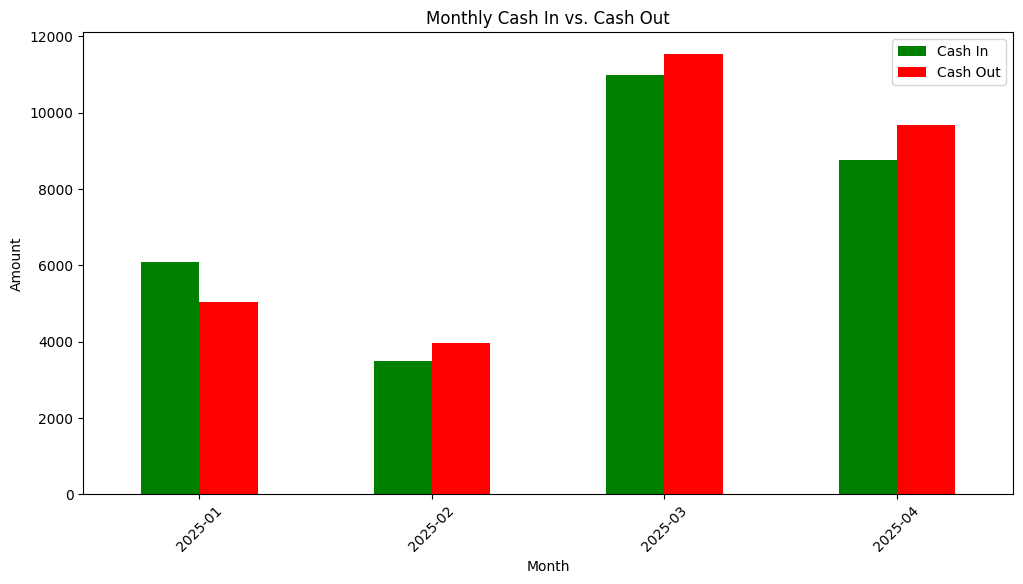

In [123]:
# Monthly Expense Trend
df["Month"] = df["Date"].dt.to_period("M")
monthly_cash_flow = df.groupby("Month")[["Cash In", "Cash Out"]].sum()
plt.figure(figsize=(12, 6))
monthly_cash_flow.plot(kind="bar", stacked=False, color=["green", "red"], figsize=(12, 6))
plt.title("Monthly Cash In vs. Cash Out")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend(["Cash In", "Cash Out"])
plt.show()

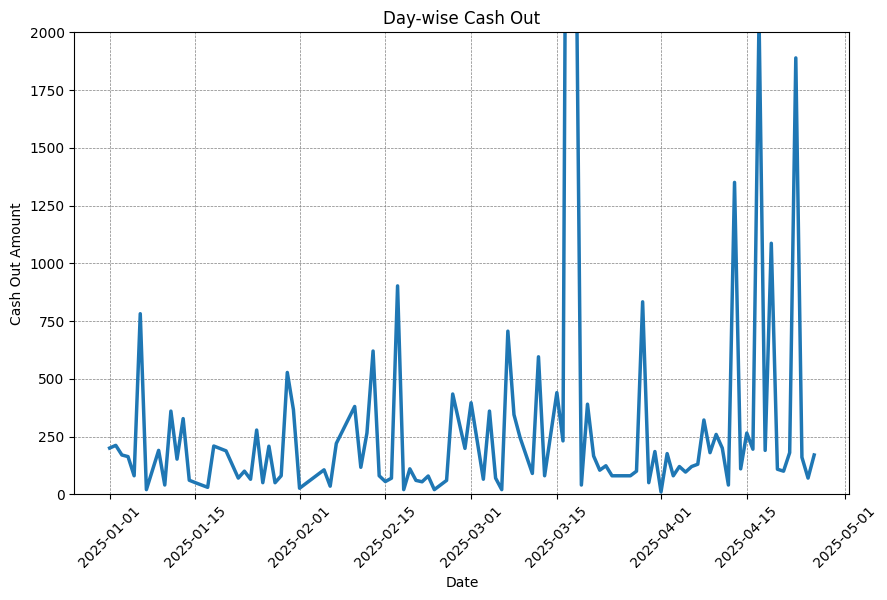

In [124]:
# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d %b %Y")

# Group by date and sum 'Cash Out'
cash_out_per_day = df.groupby("Date")["Cash Out"].sum().fillna(0)

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(cash_out_per_day.index, cash_out_per_day.values, linewidth=2.5)
plt.ylim(0, 2000)
plt.title("Day-wise Cash Out")
plt.xlabel("Date")
plt.ylabel("Cash Out Amount")
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

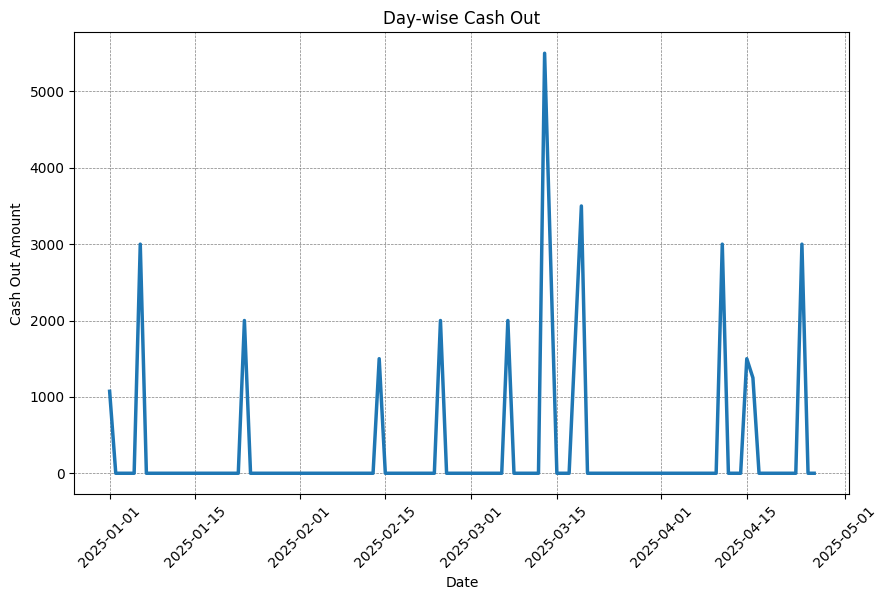

In [125]:
# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d %b %Y")

# Group by date and sum 'Cash Out'
cash_out_per_day = df.groupby("Date")["Cash In"].sum().fillna(0)

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(cash_out_per_day.index, cash_out_per_day.values, linewidth=2.5)
plt.title("Day-wise Cash Out")
plt.xlabel("Date")
plt.ylabel("Cash Out Amount")
plt.grid(True, color="gray", linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

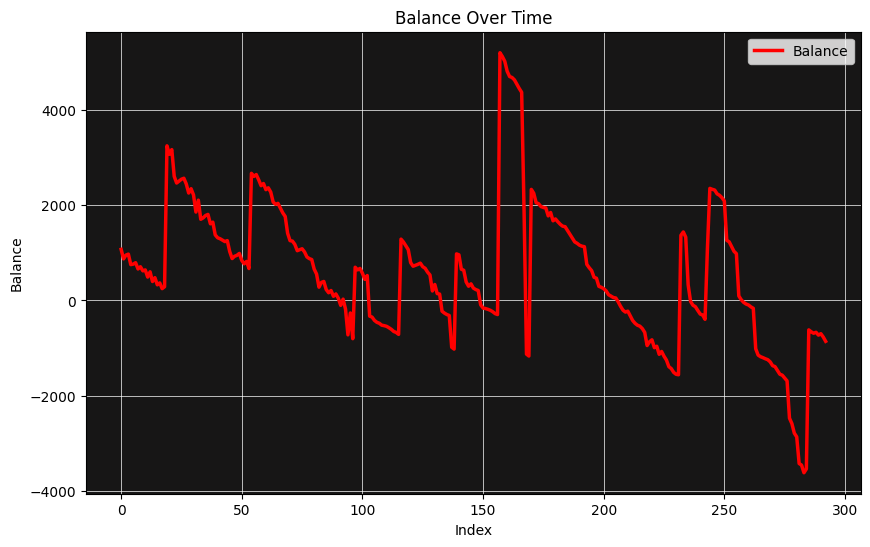

In [126]:
# Rest "Balance" Chart
file_path = "2025.csv"
temp_df = pd.read_csv(file_path)
columns_to_delete = ['Time', 'Party', 'Mode', 'Remark', 'Category', 'Cash In', 'Cash Out']
temp_df = temp_df.drop(columns=columns_to_delete)
temp_df["Date"] = pd.to_datetime(temp_df["Date"], format="%d %b %Y")
temp_df["Balance"] = pd.to_numeric(temp_df["Balance"], errors="coerce").fillna(0)

# Plot line chart
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_facecolor('#171616')  
plt.plot(temp_df.index, temp_df['Balance'], color='r', linewidth=2.5, label='Balance')
plt.title('Balance Over Time')
plt.xlabel('Index')
plt.ylabel('Balance')
plt.grid(True, color='white', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()
